/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


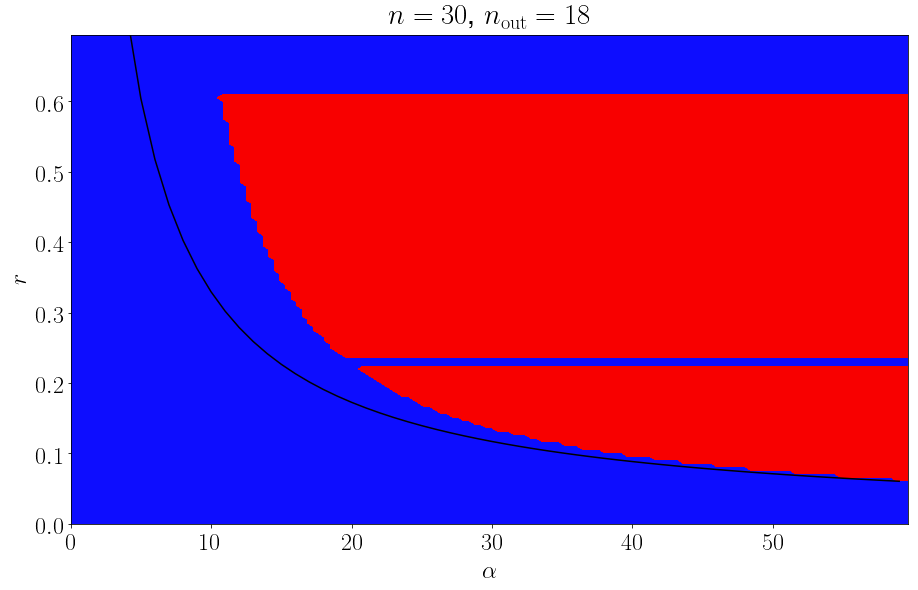

In [3]:
import mf_mdp as mm

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':24})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=24)
rc('ytick', labelsize=24)


############
#parameters
############
dr = 0.005
dalpha = 0.4
max_alpha = 60
max_r = 0.7
n = 30
q = 9
epsilon = 0.05
############
############

r = 0.
flags = np.empty((1, int(max_alpha/dalpha)), dtype=np.float64)
for k in range(int(max_r/dr)):
    
    model = mm.mf_mdp_model(n = n, q = q, epsilon = epsilon, alpha = 4., r = r)
    re_lambdas, im_lambdas, x = model.relax_constant_tracking(max_alpha, dalpha)
    flag = (re_lambdas[:,1:]<0).sum(1)
    flags = np.append(flags, np.expand_dims(flag, axis=0), axis=0)
    r = r + dr
flags = flags[1:]

x_a = np.arange(0, 60, 1)
y_a = (n - 1)/((q - 1)*(1 + x_a))

#plotting

fig = plt.figure()
fig.set_size_inches(15., 9.)
y = np.arange(0, max_r, dr)
plt.contourf(x, y, flags, levels = [-10, 0.5, 10], cmap = 'seismic')
plt.plot(x_a, y_a, 'k')
plt.ylim(top = 0.695)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$r$')
plt.title(r'$n=30$, $n_{\rm out}=18$')
plt.savefig('Stable_unstable_frontier.pdf')